# Simple Linear Regression Model

### Source of data: use same random number

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 30 # number of observation
X = np.linspace(start=1, stop=10, num=m).reshape(-1,1) # features or X

# create an array containing only "1"
ones = np.ones([X.shape[0], 1])

#cocatenate the ones to X matrix
# h(theta) = theta_0 * x_0 + theta_1 * x_1 where x_0 one vector
X_mod = np.concatenate([ones, X], 1)

Y = np.add(np.random.rand(m,1)*5, 2 * X).reshape(-1,1)
print(X_mod.shape)
print(Y.shape)

(30, 2)
(30, 1)


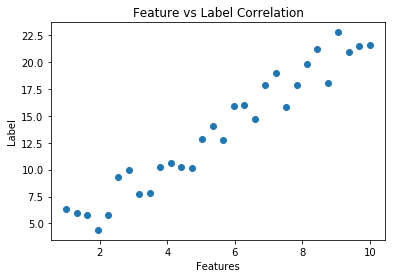

In [3]:
# plot the data
plt.scatter(X, Y)
plt.xlabel('Features')
plt.ylabel('Label')
plt.title('Feature vs Label Correlation')
plt.show()

Define cost function which is the Least Square Error

In [4]:
def compute_cost(X, Y, theta):
    inner = np.power(np.matmul(X, theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

Define the gradient descent algorithm

In [5]:
def gradient_descent(X, Y, theta, alpha, epochs):
    
    costs = []
    for i in range(epochs):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - Y) * X, axis=0)
        cost = compute_cost(X, Y, theta)
        costs.append([i, cost])
#         if i % 10 == 0:
#             print('theta: ', theta)
#             print('cost: ', cost)

    return (theta, cost, costs)

In [6]:
# Execute the gradient descent algorithm
# theta is a row vector
theta = np.array([[0.0, 0.0]])
alpha = 0.001
epochs = 100
g, cost, costs = gradient_descent(X_mod, Y, theta, alpha, epochs)
print('Final result')
print(g)
print(cost)

Final result
[[0.37799938 2.27735352]]
1.373619023823749


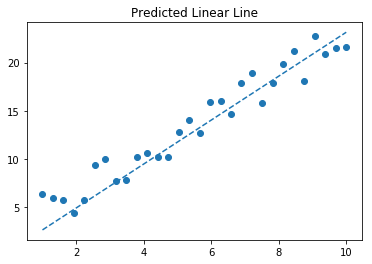

In [7]:
# final plot
plt.scatter(X[:, 0].reshape(-1,1), Y)
predicted_y = g[0][0] + g[0][1] * X
plt.plot(X, predicted_y, '--')
plt.title('Predicted Linear Line')
plt.show()

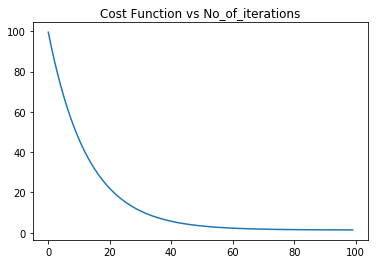

In [8]:
# list into numpy array
costs = np.asarray(costs)

# plot cost function vs no. of iterations
plt.plot(costs[:,0], costs[:,1], '-')
plt.title('Cost Function vs No_of_iterations')
plt.show()

In [16]:
# Performance Measure
# Root Mean Square Error (RMSE) is the root of the cost value
rmse = np.sqrt(cost)
print('RMSE: ', rmse)

RMSE:  1.1720149418090833



Reindexing is a great way to shuffle (randomize) a DataFrame. In the example below, we take the index, which is array-like, and pass it to NumPy's random.permutation function, which shuffles its values in place. Calling reindex with this shuffled array causes the DataFrame rows to be shuffled in the same way. Try running the following cell multiple times!

df.reindex(np.random.permutation(df.index))

## Simple Linear Regression using Scikit Learn

In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
# reshape the one feature into column-wise
X_mod_2 = X.T

reg = LinearRegression()
reg.fit(X_mod_2, Y)

reg.score(X_mod_2, Y)

0.9427574680409272

In [14]:
predicted_label = reg.predict(np.array([[20.000]]))
predicted_label

array([[42.66017599]])

In [15]:
# Estimated coefficients for the linear regression problem
reg.coef_

array([[2.00579582]])